In [75]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [76]:
df =  pd.read_csv("survey_results_public_2024.csv")

In [77]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [78]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [79]:
df = df[["Country" , "Age" ,"EdLevel", "YearsCodePro",  "DevType" ,"Employment", "ConvertedCompYearly"]]
df = df.rename({"EdLevel" : "Education" , "YearsCodePro" : "Experience" , "ConvertedCompYearly" : "Salary"} , axis = 1)
df.head()

,Country,Age,Education,Experience,DevType,Employment,Salary
0,United States of America,Under 18 years old,Primary/elementary school,NaN,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack","Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,Developer Experience,"Employed, full-time",NaN
3,Canada,18-24 years old,Some college/university study without earning ...,NaN,"Developer, full-stack","Student, full-time",NaN
4,Norway,18-24 years old,"Secondary school (e.g. American high school, G...",NaN,"Developer, full-stack","Student, full-time",NaN


In [80]:
df =  df[df["Salary"].notnull()]
df.head()

,Country,Age,Education,Experience,DevType,Employment,Salary
72,Pakistan,18-24 years old,"Secondary school (e.g. American high school, G...",1,Data scientist or machine learning specialist,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,25-34 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,Academic researcher,"Employed, full-time",30074.0
379,Turkey,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist,"Employed, full-time",91295.0
385,France,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Developer, back-end","Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,25-34 years old,Some college/university study without earning ...,7,Student,"Employed, full-time;Student, part-time",110000.0


In [81]:
df.shape

(23435, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     23435 non-null  object 
 1   Age         23435 non-null  object 
 2   Education   23435 non-null  object 
 3   Experience  23345 non-null  object 
 4   DevType     23403 non-null  object 
 5   Employment  23435 non-null  object 
 6   Salary      23435 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [83]:
# get missing values
#df = df.dropna()
df.isnull().sum()

Country        0
Age            0
Education      0
Experience    90
DevType       32
Employment     0
Salary         0
dtype: int64

In [84]:
# remove missing values
df['Experience'] = pd.to_numeric(df['Experience'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     23435 non-null  object 
 1   Age         23435 non-null  object 
 2   Education   23435 non-null  object 
 3   Experience  22674 non-null  float64
 4   DevType     23403 non-null  object 
 5   Employment  23435 non-null  object 
 6   Salary      23435 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [85]:
# fill with mean
df["Experience"].mean()

10.49814765811061

In [86]:
df["Experience"] = df["Experience"].fillna(df["Experience"].mean())
df.isnull().sum()

Country        0
Age            0
Education      0
Experience     0
DevType       32
Employment     0
Salary         0
dtype: int64

In [87]:
mode_of_dev_type = df.pivot_table(values='DevType', columns='Country', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None)
print(mode_of_dev_type)

Country            Afghanistan                Albania                Algeria  \
DevType  Developer, full-stack  Developer, full-stack  Developer, full-stack   

Country              Andorra               Angola    Antigua and Barbuda  \
DevType  Developer, back-end  Developer, back-end  Developer, full-stack   

Country              Argentina              Armenia              Australia  \
DevType  Developer, full-stack  Developer, back-end  Developer, full-stack   

Country                Austria  ...  \
DevType  Developer, full-stack  ...   

Country United Kingdom of Great Britain and Northern Ireland  \
DevType                              Developer, full-stack     

Country United Republic of Tanzania United States of America  \
DevType       Developer, full-stack    Developer, full-stack   

Country                Uruguay           Uzbekistan  \
DevType  Developer, full-stack  Developer, back-end   

Country Venezuela, Bolivarian Republic of...               Viet Nam  \
DevType   

In [88]:
missing_values = df['DevType'].isnull()
print(missing_values)

72       False
374      False
379      False
385      False
389      False
         ...  
41180    False
41184    False
41185    False
41186    False
41187    False
Name: DevType, Length: 23435, dtype: bool


In [89]:
# replace the missing value use mode - lambda function
df.loc[missing_values, 'DevType'] = df.loc[missing_values, 'Country'].apply(lambda Country: mode_of_dev_type[Country])

In [90]:
df.isnull().sum()

Country       0
Age           0
Education     0
Experience    0
DevType       0
Employment    0
Salary        0
dtype: int64

In [91]:
df['Country'].value_counts()

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
                                                        ... 
Togo                                                       1
Central African Republic                                   1
Sudan                                                      1
Oman                                                       1
Haiti                                                      1
Name: count, Length: 166, dtype: int64

In [92]:
df['Country'].unique()

array(['Pakistan', 'Austria', 'Turkey', 'France',
       'United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Bulgaria',
       'Greece', 'Brazil', 'Germany', 'Italy', 'Ukraine',
       'Russian Federation', 'South Africa', 'Czech Republic', 'Canada',
       'Iran, Islamic Republic of...', 'Dominican Republic',
       'Switzerland', 'Belgium', 'Peru', 'Bolivia', 'Morocco', 'India',
       'Luxembourg', 'Georgia', 'Saudi Arabia', 'Ireland', 'Romania',
       'Spain', 'Cyprus', 'Paraguay', 'Lithuania', 'Netherlands',
       'Slovenia', 'Singapore', 'Venezuela, Bolivarian Republic of...',
       'Japan', 'Latvia', 'Sweden', 'Costa Rica', 'Poland', 'Norway',
       'Portugal', 'Finland', 'Israel', 'Nicaragua', 'Serbia', 'Croatia',
       'Hungary', 'Bangladesh', 'Indonesia', 'Denmark',
       'Bosnia and Herzegovina', 'Mexico', 'Philippines', 'Thailand',
       'Slovakia', 'El Salvador', 'Ecuador', 'Argentina', 'Algeria',
       'Kazakhstan', 'Malaysi

In [93]:
sri_lanka_count = (df['Country'] == 'Sri Lanka').sum()

print(f"Sri Lanka count: {sri_lanka_count}")

Sri Lanka count: 55


In [94]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [95]:
country_map = shorten_categories(df.Country.value_counts(), 55)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
Other                                                   1443
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
France                                                   918
Canada                                                   871
Brazil                                                   685
Poland                                                   586
Netherlands                                              561
Spain                                                    559
Italy                                                    540
Australia                                                510
Sweden                                                   457
Switzerland                                              386
Austria         

In [96]:
df['Country'].unique()

array(['Pakistan', 'Austria', 'Turkey', 'France',
       'United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Bulgaria',
       'Greece', 'Brazil', 'Germany', 'Italy', 'Ukraine',
       'Russian Federation', 'South Africa', 'Czech Republic', 'Canada',
       'Iran, Islamic Republic of...', 'Other', 'Switzerland', 'Belgium',
       'India', 'Ireland', 'Romania', 'Spain', 'Lithuania', 'Netherlands',
       'Slovenia', 'Singapore', 'Japan', 'Sweden', 'Poland', 'Norway',
       'Portugal', 'Finland', 'Israel', 'Serbia', 'Croatia', 'Hungary',
       'Bangladesh', 'Indonesia', 'Denmark', 'Mexico', 'Philippines',
       'Slovakia', 'Argentina', 'Colombia', 'Egypt', 'Australia',
       'New Zealand', 'Nigeria', 'Viet Nam', 'China', 'Sri Lanka',
       'Taiwan'], dtype=object)

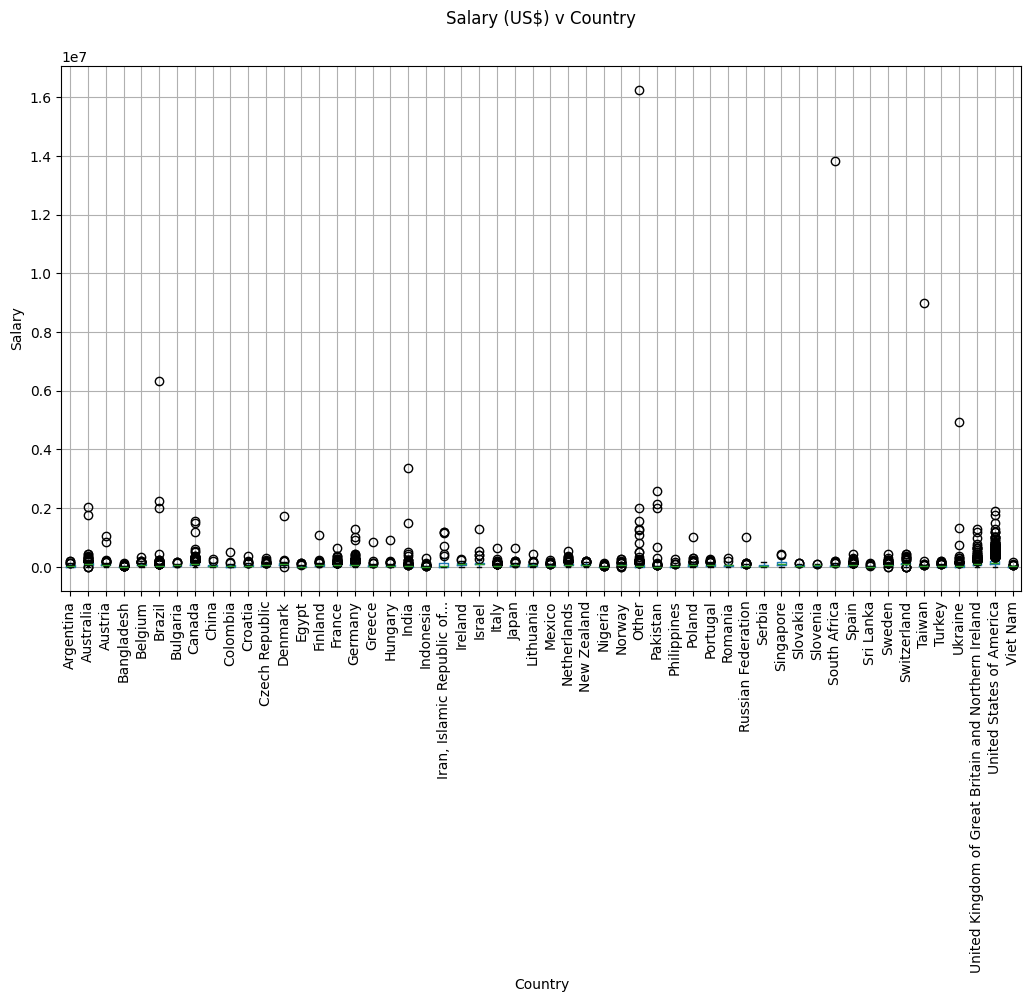

In [97]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show() #  box plot

In [98]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

In [99]:
df['Age'].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

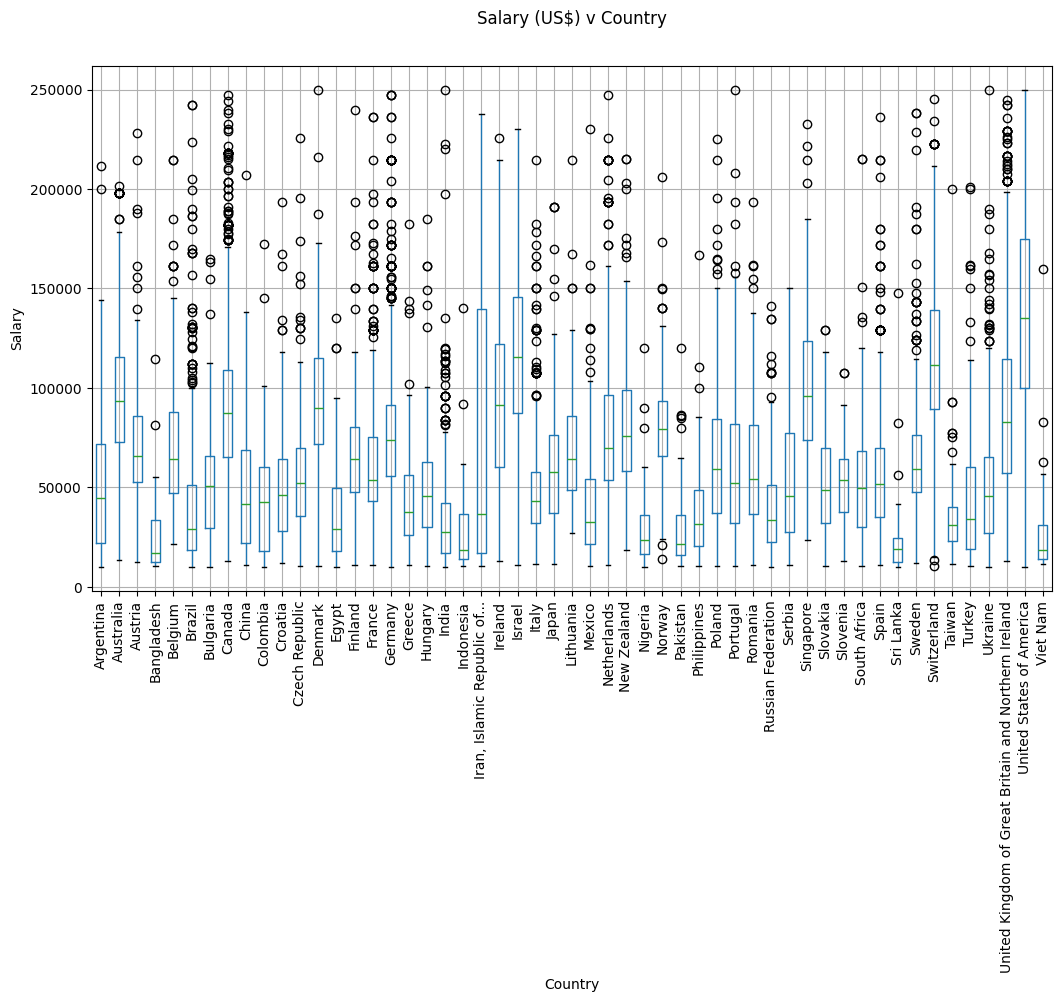

In [100]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [101]:
df.Age.value_counts()

Age
25-34 years old       8557
35-44 years old       5381
18-24 years old       2380
45-54 years old       2073
55-64 years old        792
65 years or older      124
Under 18 years old      25
Prefer not to say        8
Name: count, dtype: int64

In [102]:
df = df[df['Age'] != 'Prefer not to say']
df.Age.value_counts()


Age
25-34 years old       8557
35-44 years old       5381
18-24 years old       2380
45-54 years old       2073
55-64 years old        792
65 years or older      124
Under 18 years old      25
Name: count, dtype: int64

In [103]:
df['Age'].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Under 18 years old'], dtype=object)

In [104]:
df['Experience'].unique()

array([ 6.        , 17.        ,  7.        , 18.        , 25.        ,
       30.        , 20.        , 50.        , 27.        , 16.        ,
        1.        ,  4.        , 15.        , 11.        , 23.        ,
       10.        ,  9.        ,  8.        , 12.        , 26.        ,
       40.        , 14.        , 22.        ,  5.        , 28.        ,
       44.        , 42.        , 13.        ,  3.        , 35.        ,
       31.        , 41.        , 36.        , 24.        , 10.49814766,
        2.        , 38.        , 32.        , 34.        , 21.        ,
       19.        , 29.        , 45.        , 43.        , 33.        ,
       48.        , 37.        , 39.        , 46.        , 49.        ,
       47.        ])

In [105]:
def clean_experience(x):
    # Use a threshold to handle floating-point precision
    return 10.0 if abs(x - 10.49814766) < 1e-6 else float(x)

df['Experience'] = df['Experience'].apply(clean_experience)

In [106]:
df['Experience'].unique()

array([ 6., 17.,  7., 18., 25., 30., 20., 50., 27., 16.,  1.,  4., 15.,
       11., 23., 10.,  9.,  8., 12., 26., 40., 14., 22.,  5., 28., 44.,
       42., 13.,  3., 35., 31., 41., 36., 24.,  2., 38., 32., 34., 21.,
       19., 29., 45., 43., 33., 48., 37., 39., 46., 49., 47.])

In [107]:
df["Education"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [108]:
def clean_education(x):
    if 'Primary/elementary school' in x or 'Secondary school' in x:
        return 'High School or Below'
    if 'Associate degree' in x or 'Some college/university study without earning a degree' in x:
        return 'Undergraduate'
    if 'Bachelor’s degree' in x:
        return 'Graduate'
    if 'Professional degree' in x:
        return 'Postgraduate'
    if 'Master’s degree' in x:
        return 'Masters degree'
    return 'Other'  # Default category for any unexpected value


df['Education'] = df['Education'].apply(clean_education)

In [109]:
df.Education.value_counts()

Education
Graduate                8349
Masters degree          5850
Undergraduate           2897
High School or Below    1049
Postgraduate            1007
Other                    180
Name: count, dtype: int64

In [110]:
df["Education"].unique()

array(['Postgraduate', 'Masters degree', 'Undergraduate', 'Graduate',
       'High School or Below', 'Other'], dtype=object)

In [111]:
df.head()

,Country,Age,Education,Experience,DevType,Employment,Salary
374,Austria,25-34 years old,Postgraduate,6.0,Academic researcher,"Employed, full-time",30074.0
379,Turkey,35-44 years old,Masters degree,6.0,Data scientist or machine learning specialist,"Employed, full-time",91295.0
385,France,35-44 years old,Masters degree,17.0,"Developer, back-end","Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,25-34 years old,Undergraduate,7.0,Student,"Employed, full-time;Student, part-time",110000.0
392,United Kingdom of Great Britain and Northern I...,35-44 years old,Postgraduate,18.0,Engineering manager,"Employed, full-time",161044.0


In [112]:
df["Employment"].value_counts()

Employment
Employed, full-time                                                                                                                14842
Employed, full-time;Independent contractor, freelancer, or self-employed                                                            1338
Independent contractor, freelancer, or self-employed                                                                                1305
Employed, part-time                                                                                                                  342
Employed, full-time;Student, part-time                                                                                               304
Employed, full-time;Student, full-time                                                                                               274
Student, full-time;Employed, part-time                                                                                               218
Student, part-time;Employed, p

In [113]:
# Define a function to categorize employment types
def categorize_employment(x):
    if "Employed, full-time" in x or "Student, full-time" in x :
        return "Full-time"
    if "Employed, part-time" in x or "Student, part-time" in x:
        return "Part-time"
    return None  # For rows that don't match any category

# Apply the function to create a new categorized column
df['Employment'] = df['Employment'].apply(categorize_employment)

# Filter the DataFrame to keep only categorized rows
df = df[df['Employment'].notna()]

# Verify the results
df['Employment'].value_counts()


Employment
Full-time    17264
Part-time      692
Name: count, dtype: int64

In [114]:
df['Employment'].unique()

array(['Full-time', 'Part-time'], dtype=object)

In [115]:
df["DevType"].value_counts()

DevType
Developer, full-stack                            6287
Developer, back-end                              3665
Developer, front-end                              998
Developer, desktop or enterprise applications     849
Developer, embedded applications or devices       649
Developer, mobile                                 552
Other (please specify):                           513
Data engineer                                     457
Engineering manager                               437
DevOps specialist                                 409
Data scientist or machine learning specialist     358
Academic researcher                               346
Research & Development role                       325
Cloud infrastructure engineer                     225
Senior Executive (C-Suite, VP, etc.)              190
Developer, QA or test                             187
Data or business analyst                          167
Developer, game or graphics                       144
Developer, AI       

In [116]:
def clean_devtype(x):
    if "full-stack" in x:
        return "Full-Stack Developer"
    if "back-end" in x :
        return "Back-End Developer"
    if "front-end" in x:
        return "Front-End Developer"
    if "desktop" in x :
        return "Desktop/Enterprise Application Developer"
    if "mobile" in x:
        return "Mobile Developer"
    if "Game" in x or "Graphics" in x :
        return "Game/Graphics Developer"
    if "AI" in x:
        return "AI Developer"
    if "Engineer" in x :
        return "Engineer"
    return 'Other'  # Default category for any unexpected value


df['DevType'] = df['DevType'].apply(clean_devtype)
# Verify the results
df['DevType'].value_counts()


DevType
Full-Stack Developer                        6287
Other                                       4868
Back-End Developer                          3665
Front-End Developer                          998
Desktop/Enterprise Application Developer     849
Engineer                                     600
Mobile Developer                             552
AI Developer                                 137
Name: count, dtype: int64

In [117]:
df['DevType'].unique()

array(['Other', 'Engineer', 'Full-Stack Developer', 'Back-End Developer',
       'Front-End Developer', 'Mobile Developer',
       'Desktop/Enterprise Application Developer', 'AI Developer'],
      dtype=object)

In [118]:
df.head()

,Country,Age,Education,Experience,DevType,Employment,Salary
374,Austria,25-34 years old,Postgraduate,6.0,Other,Full-time,30074.0
379,Turkey,35-44 years old,Masters degree,6.0,Other,Full-time,91295.0
389,United States of America,25-34 years old,Undergraduate,7.0,Other,Full-time,110000.0
392,United Kingdom of Great Britain and Northern I...,35-44 years old,Postgraduate,18.0,Engineer,Full-time,161044.0
395,United Kingdom of Great Britain and Northern I...,45-54 years old,Masters degree,25.0,Other,Full-time,121018.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17956 entries, 374 to 41187
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     17956 non-null  object 
 1   Age         17956 non-null  object 
 2   Education   17956 non-null  object 
 3   Experience  17956 non-null  float64
 4   DevType     17956 non-null  object 
 5   Employment  17956 non-null  object 
 6   Salary      17956 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [120]:
 # for change numberic to all 
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])
df["Age"].unique()

array([1, 2, 3, 4, 0, 5, 6])

In [121]:
le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])
df["Education"].unique()

array([4, 2, 5, 0, 1, 3])

In [122]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([ 2, 48, 51, 50,  6, 15, 17,  5, 16, 49, 37, 42, 11, 21,  7, 24, 46,
       19, 22, 43, 26, 28, 41, 36, 32, 25, 45, 34, 31, 35, 14, 23, 10, 18,
        3, 20, 12, 27, 33, 40,  0,  4,  9,  1, 38, 29, 13,  8, 52, 39, 47,
       30, 44])

In [123]:
le_dev = LabelEncoder()
df['DevType'] = le_dev.fit_transform(df['DevType'])
df["DevType"].unique()

array([7, 3, 5, 1, 4, 6, 2, 0])

In [124]:
le_employment = LabelEncoder()
df['Employment'] = le_employment.fit_transform(df['Employment'])
df["Employment"].unique()

array([0, 1])

In [125]:
# create model select feature and prediction 
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [126]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)
# .fit() method trains the model by finding the optimal coefficients (weights) and the intercept for the given data.

LinearRegression()

In [127]:
y_pred = linear_reg.predict(X)
linear_reg.score(X, y.values)# accuracy


0.25243922779150096

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [129]:
error

44806.016846047816

In [130]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [131]:
y_pred = dec_tree_reg.predict(X)

In [132]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$21,372.93


In [133]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [134]:
y_pred = random_forest_reg.predict(X)

In [135]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$23,090.93


In [136]:
from sklearn.model_selection import GridSearchCV #fine-tunes 

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [137]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,830.70


In [138]:
X

,Country,Age,Education,Experience,DevType,Employment
374,2,1,4,6.0,7,0
379,48,2,2,6.0,7,0
389,51,1,5,7.0,7,0
392,50,2,4,18.0,3,0
395,50,3,2,25.0,7,0
...,...,...,...,...,...,...
41180,45,1,2,3.0,7,0
41184,51,3,2,30.0,7,0
41185,51,2,0,15.0,5,0
41186,51,0,5,1.0,5,0


In [139]:
# country, edlevel, yearscode
X = np.array([["United States of America", "25-34 years old", "Graduate" , 15 ,"Full-Stack Developer","Full-time"]])
X

array([['United States of America', '25-34 years old', 'Graduate', '15',
        'Full-Stack Developer', 'Full-time']], dtype='<U24')

In [140]:
X[:, 0] = le_country.transform(X[:,0]) #all rows (denoted by :) but only the first column (0) of the array.
X[:, 1] = le_age.transform(X[:,1])#Label Encoder - le this second column 1
X[:, 2] = le_education.transform(X[:,2])
X[:, 4] = le_dev.transform(X[:,4])
X[:, 5] = le_employment.transform(X[:,5])
X = X.astype(float)
X

array([[51.,  1.,  0., 15.,  5.,  0.]])

In [141]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Rubitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([149632.93630573])

In [142]:
import pickle

In [143]:
data = {"model": regressor,"le_country":le_country,"le_age":le_age,"le_education":le_education,"le_dev" : le_dev,"le_employment":le_employment }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [144]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_age = data["le_age"]
le_education = data["le_education"]
le_dev = data["le_dev"]
le_employment = data["le_employment"]

In [145]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Rubitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([149632.93630573])

### each model's performance using the Root Mean Squared Error (RMSE) and 
### fine-tunes the Decision Tree Regressor using GridSearchCV